In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [2]:
datalist = glob.glob('../dataFolders/Tracking Errors/**.csv', recursive=True)

In [9]:
namelist = []
for data in datalist:
    _, tail = os.path.split(data)
    namelist.append(tail[:-4])

In [14]:
circle_params = pd.read_csv('../dataFolders/circle_parameters.csv')
circle_params.head()

,Unnamed: 0,name,circ_x,circ_y,circ_radii
0,0,c-1_m13,308,240,76
1,1,c-2_m5,309,238,74
2,2,c-3_m10,308,239,74
3,3,c-10_m11,307,239,74
4,4,c-1_m2,310,241,75


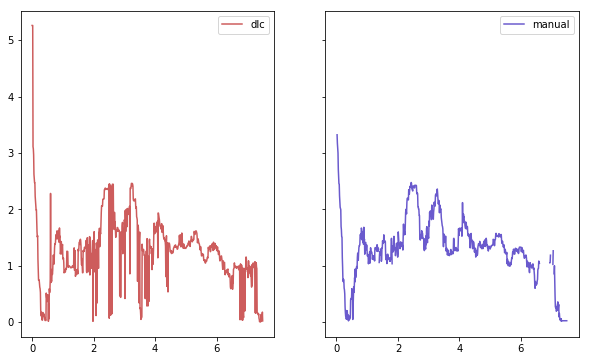

In [65]:
num = 16
file = pd.read_csv(datalist[num])

x = file.dlc_x
y = file.dlc_y

manual_x = file.manual_x
manual_y = file.manual_y

for i in np.arange(len(circle_params)):
    if circle_params.name[i] in namelist[num]:
        circ_deet = circle_params.loc[i,:].copy()

cent_x = circ_deet.circ_x
cent_y = circ_deet.circ_y
circ_radius = circ_deet.circ_radii

centered_x = x - cent_x
centered_y = y - cent_y
r = np.linalg.norm([centered_x, centered_y], axis = 0)
radius = r/circ_radius

manual_centered_x = manual_x - cent_x
manual_centered_y = manual_y - cent_y
manual_r = np.linalg.norm([manual_centered_x, manual_centered_y], axis = 0)
manual_radius = manual_r/circ_radius

fig, ax = plt.subplots(1,2, figsize = (10,6), sharex = True, sharey = True)
t0 = np.arange(len(r))*1/100
ax[0].plot(t0, radius, color = 'indianred' , label = 'dlc')
ax[0].legend()
ax[1].plot(t0, manual_radius, color = 'slateblue' , label = 'manual')
ax[1].legend()

plt.savefig('../dataFolders/Figures/Tracking Errors/sample_radiusOverTime.png')

In [ ]:
# import cmocean
plt.style.use('ggplot')
from cycler import cycler
# import matplotlib.cm as cm
import matplotlib as mpl

fig, ax = plt.subplots(2,4, sharex = True, sharey = True, figsize = (30,10))

uber_df = pd.read_csv('./dataFolders/compiledTrackData.csv')
circle_params = pd.read_csv('./dataFolders/circle_parameters.csv')

shapes = ['c-1_', 'c-2_', 'c-3_', 'c-10_']

# colors = cm.tab10(np.linspace(0, 1, len(namelist)))
# print(colors)
i = 0 # to align to correct subplot
cc = 0 # iterate through colors


for flower in shapes:
    moths = [name for name in namelist if flower in name]
    n = len(moths)
    # Change default color cycle for each shape
    # loop though colors for all moths in a shape
    mpl.rcParams['axes.prop_cycle']= cycler(color = 'brg') #cycle_cmap(n, cmap = 'brg')  
    
    for name in moths:
                
        # get the radius and theta tracks
        radius_first = uber_df[(uber_df.name == name) & (uber_df.trial == '0')].radius.values
        theta_first = uber_df[(uber_df.name == name) & (uber_df.trial == '0')].theta.values

        radius_last = uber_df[(uber_df.name == name) & (uber_df.trial == 'last')].radius.values
        theta_last = uber_df[(uber_df.name == name) & (uber_df.trial == 'last')].theta.values

        radius = circle_params[circle_params.name == name].circ_radii.values[0]

        # draw it NOW! :D (hehehehahahaha!!! :D )

        t0 = np.arange(len(radius_first))*1/100
#         f0 = ax[0, i].scatter(t0, radius_first/radius, s = 8, 
#                               label = name)
        f0 = ax[0, i].plot(t0, radius_first/radius, 
                              label = name)

        ax[0, i].set_title(name + ' first trial')
        ax[0, i].legend()
        
        tlast = np.arange(len(radius_last))*1/100
#         f1 = ax[1, i].scatter(tlast, radius_last/radius, s = 8)
        f1 = ax[1, i].plot(tlast, radius_last/radius)

        ax[1, i].set_title(name + ' last trial')

        ax[0, i].set_yticks(np.arange(5))
        ax[0, i].set_yticklabels(['0', 'r', '2r', '3r', '4r'])
        ax[0, i].tick_params('both', labelsize = 20)
        ax[1, i].tick_params('both', labelsize = 20)
#         print(colors[cc])
        cc+=1
        
    
    i+=1
    fig.text(0.0, 0.5, 'Radial distance (normalized to flower radius)',
             ha='center', va='center', rotation='vertical', fontsize = '20')
    fig.text(0.5, 0.0, 'Time (seconds)',
             ha='center', va='center', rotation='horizontal', fontsize = '20')

plt.tight_layout()
plt.savefig('./dataFolders/Figures/AllData_RadialDistOverTime_lineplot.png', bbox_inches="tight")